<h1 style="color:black;">HW02 </h1>

**BY WASIM RAJA MONDAL**

<h3 style="color:black;"> 1. Creating a folder on my computer</h3>

In [7]:
!pwd #created a folder

/Users/wasim/Desktop/HW02


In [8]:
!ls #created another folder data inside teh folder

data


<h3 style="color:black;"> 2. From D2L, download Real Estate Data.csv and Create a Jupyter Notebook.</h3>

In [9]:
!pwd

/Users/wasim/Desktop/HW02


In [12]:
!ls data/

Real Estate Data - Week 2.csv


In [13]:
!ls

HW02_MondalW.ipynb data


<h3 style="color:black;"> 3. Import libraries (numpy, pandas, matplotlib, seaborn, style)</h3>

In [31]:
!pip install numpy #installing numpy
!pip install pandas #installing pandas
!pip install matplotlib #installing matplotlib
!pip install seaborn #installing seaborn
import numpy as np  #importing numpy
import pandas as pd #importing pandas
import seaborn as sns #importing seaborn
import pandas as pd #importing pandas
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe
plt.style.use("seaborn-v0_8-whitegrid") ##a style that can be used for plots


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


<h3 style="color:black;"> 4. Import Data</h3>

In [32]:
#importing a csv file Real Estate Data - Week 2.csv from the directory named as data with index_col=none and header=0
#index_col=none suggests no column should be used as index. Pandas will autometically generate a numeric index (0,1,2,..) 
#header=0 means the first row (row 0) of the csv file contains the column names

In [33]:
df_realestate = pd.read_csv('data/Real Estate Data - Week 2.csv', index_col = None, header=0)

In [34]:
df_realestate.info() #executing the view of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1390 non-null   int64  
 1   Dwelling Type             1390 non-null   object 
 2   Lot Frontage              1138 non-null   float64
 3   Lot Area                  1390 non-null   int64  
 4   Alley                     83 non-null     object 
 5   Land Contour              1390 non-null   object 
 6   Neighborhood              1390 non-null   object 
 7   Location Condition        1390 non-null   object 
 8   Overall Quality           1390 non-null   int64  
 9   Overall Cond              1390 non-null   int64  
 10  Year Built                1390 non-null   int64  
 11  Masonry/Veneer Area       1382 non-null   float64
 12  Basement Finished Area    1390 non-null   int64  
 13  Basement Unfinished Area  1390 non-null   int64  
 14  Basement

<h3 style="color:black;"> 5. Create Groupby Dataframes and Barplot</h3>

<h4 style="color:black;"> 5a: Create the df_results dataframe</h4>

In [35]:
df_locCond=df_realestate.groupby('Location Condition')['Sale Price'].mean()
df_locCond = pd.DataFrame(df_locCond).reset_index()
df_locCond=df_locCond.sort_values(by='Sale Price', ascending=False)
df_locCond

,Location Condition,Sale Price
2,Adjacent Pos Feature,225875.000000
4,Near Pos Feature,215184.210526
6,Normal,184187.152500
5,Near Railroad,181888.888889
3,Adjacent Railroad,175057.216216
1,Adjacent Feeder St,146946.698630
0,Adjacent Arterial St,136975.000000


<h4 style="color:black;"> 5b: Create a Barplot based on Dwelling Type</h4>

Text(0, 0.5, 'Dwelling Type')

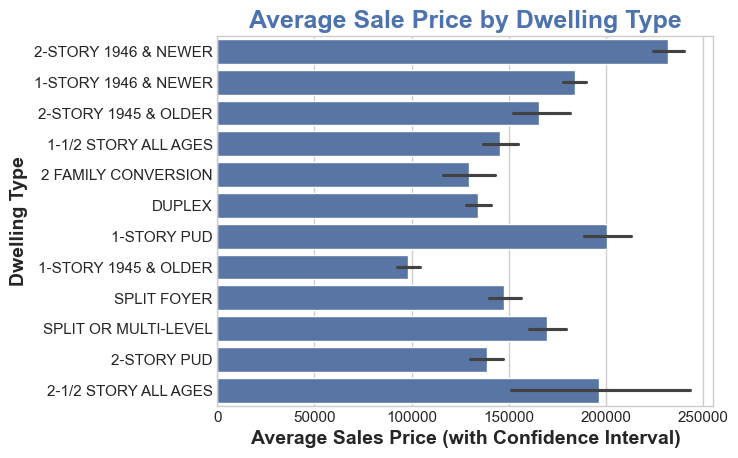

In [36]:
sns.barplot(x = "Sale Price", y = "Dwelling Type", data =df_realestate, order = df_realestate['Dwelling Type'],color='b')
plt.title('Average Sale Price by Dwelling Type', fontweight='bold', color = 'b', fontsize='18', horizontalalignment='center')
plt.xlabel('Average Sales Price (with Confidence Interval)', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.ylabel('Dwelling Type', fontweight='bold', fontsize='14', horizontalalignment='center')

2-STORY 1946 & NEWER has the highest Average Sales Price and 2-1/2 STORY ALL AGES has the lowest Average Sales Price

<h4 style="color:black;"> 5c: Create a Barplot based on Location Condition</h4>

In [37]:
df_locCond=df_realestate.groupby('Location Condition')['Sale Price'].count() #group by ‘Location Condition’ that takes a count of ‘Sale Price’
df_locCond = pd.DataFrame(df_locCond).reset_index() # Reset the index
df_locCond=df_locCond.sort_values(by='Sale Price', ascending=False) #Sort df_locCond from largest to smallest based on Sale price values
df_locCond

,Location Condition,Sale Price
6,Normal,1200
1,Adjacent Feeder St,73
0,Adjacent Arterial St,44
3,Adjacent Railroad,37
4,Near Pos Feature,19
5,Near Railroad,9
2,Adjacent Pos Feature,8


In [38]:
var_total=df_locCond['Sale Price'].sum() #summing all values of Sales price and storing output in var_total

In [39]:
df_locCond['Percent']=df_locCond['Sale Price']/var_total # creating a new column which stores sales price divided by var_total

In [40]:
df_locCond

,Location Condition,Sale Price,Percent
6,Normal,1200,0.863309
1,Adjacent Feeder St,73,0.052518
0,Adjacent Arterial St,44,0.031655
3,Adjacent Railroad,37,0.026619
4,Near Pos Feature,19,0.013669
5,Near Railroad,9,0.006475
2,Adjacent Pos Feature,8,0.005755


Text(0.5, 1.0, 'Percentage of Houses by Location Condition')

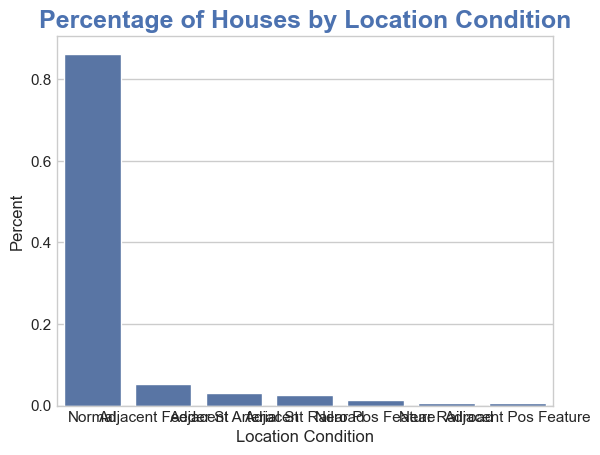

In [41]:
sns.barplot(x = "Location Condition", y = "Percent", data =df_locCond,color='b')
plt.title('Percentage of Houses by Location Condition', fontweight='bold', color = 'b', fontsize='18', horizontalalignment='center')

In normal location condition, number of houses are maximum. In otherwords, most houses are in normal condition, whereas Adjacent Pos Feature location, there are very few houses.  

<h3 style="color:black;"> 6. Create Distributions with Histograms and (Boxplots, Violoinplots, and Boxenplots)</h3>

<h4 style="color:black;"> 6a: Histogram of Living Area Above Grade</h4>

/var/folders/p1/pwvyyzw90ms7kks3m6v5fy940000gn/T/ipykernel_1970/3686142767.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_realestate['Living Area Above Grade'], kde=False, color="b")


Text(0, 0.5, 'Count')

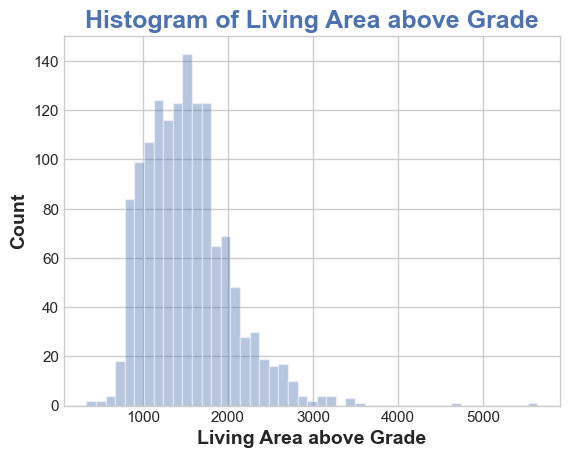

In [42]:
sns.distplot(df_realestate['Living Area Above Grade'], kde=False, color="b")
plt.title('Histogram of Living Area above Grade', fontweight='bold', color = 'b', fontsize='18', horizontalalignment='center')
plt.xlabel('Living Area above Grade', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.ylabel('Count', fontweight='bold', fontsize='14', horizontalalignment='center')

The above histogram is symmtric. It is skewed in one direction which suggest mean and median is not same for this dataset. There may be few outliers. 

<h4 style="color:black;"> 6b: Boxenplot of Sale Price by Kitchen Quality Rating</h4>

Text(0, 0.5, 'Sale Price')

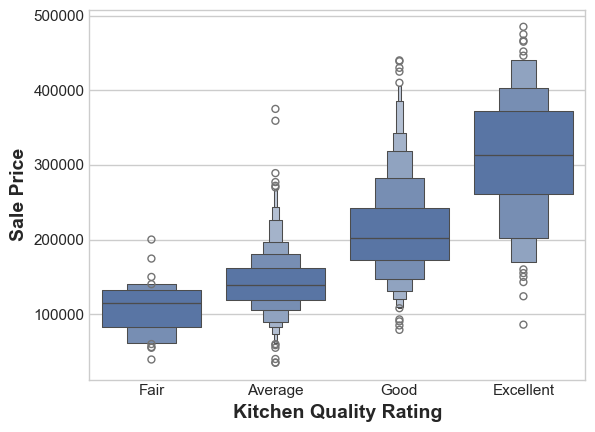

In [43]:
sns.boxenplot(x='Kitchen Qual', y='Sale Price', data=df_realestate,color="b", order= ['Fair','Average','Good','Excellent'])
plt.xlabel('Kitchen Quality Rating', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.ylabel('Sale Price', fontweight='bold', fontsize='14', horizontalalignment='center')

Boxen plot shows more than five statistics box plot. Here , we are observing outliers for each Kitchen Quality Rating. These outlier values are displayed as point beyond the box range values. 

<h4 style="color:black;"> Section 6c: Create Z-Scores for Sale Price and Violinplot</h4>

In [44]:
mean_price = df_realestate['Sale Price'].mean()
stdev_price = df_realestate['Sale Price'].std()
print("The mean sale price is$",mean_price)
print("The standard deviation of sale price is$",stdev_price)

The mean sale price is$ 181142.5964028777
The standard deviation of sale price is$ 71523.88847232792


In [45]:
df_realestate['z_score'] = ((df_realestate['Sale Price']-mean_price)/stdev_price)
df_realestate

,Id,Dwelling Type,Lot Frontage,Lot Area,Alley,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,Basement Area,1st Floor Area,2nd Floor Area,Living Area Above Grade,Basement Full Baths,Basement Half baths,Full Baths Above Grade,Half Baths Above Grade,Bedrooms Above Grade,Kitchens Above Grade,Kitchen Qual,Total Rooms Above Grade,Fireplaces,Garage Yr Built,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price,z_score
0,1,2-STORY 1946 & NEWER,65.0,8450,NaN,Level,College Creek,Normal,7,5,2003,196.0,706,150,856,856,854,1710,1,0,2,1,3,1,Good,8,0,2003.0,Rough Finished,2,0,61,0,0,0,0,Normal Sale,208500,0.382493
1,2,1-STORY 1946 & NEWER,80.0,9600,NaN,Level,Veenker,Adjacent Feeder St,6,8,1976,0.0,978,284,1262,1262,0,1262,0,1,2,0,3,1,Average,6,1,1976.0,Rough Finished,2,298,0,0,0,0,0,Normal Sale,181500,0.004997
2,3,2-STORY 1946 & NEWER,68.0,11250,NaN,Level,College Creek,Normal,7,5,2001,162.0,486,434,920,920,866,1786,1,0,2,1,3,1,Good,6,1,2001.0,Rough Finished,2,0,42,0,0,0,0,Normal Sale,223500,0.592213
3,4,2-STORY 1945 & OLDER,60.0,9550,NaN,Level,Crawford,Normal,7,5,1915,0.0,216,540,756,961,756,1717,1,0,1,0,3,1,Good,7,1,1998.0,Unfinished,3,0,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000,-0.575229
4,5,2-STORY 1946 & NEWER,84.0,14260,NaN,Level,Northridge,Normal,8,5,2000,350.0,655,490,1145,1145,1053,2198,1,0,2,1,4,1,Good,9,1,2000.0,Rough Finished,3,192,84,0,0,0,0,Normal Sale,250000,0.962719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,1456,2-STORY 1946 & NEWER,62.0,7917,NaN,Level,Gilbert,Normal,6,5,1999,0.0,0,953,953,953,694,1647,0,0,2,1,3,1,Average,7,1,1999.0,Rough Finished,2,0,40,0,0,0,0,Normal Sale,175000,-0.085882
1386,1457,1-STORY 1946 & NEWER,85.0,13175,NaN,Level,Northwest Ames,Normal,6,6,1978,119.0,790,589,1542,2073,0,2073,1,0,2,0,3,1,Average,7,2,1978.0,Unfinished,2,349,0,0,0,0,0,Normal Sale,210000,0.403465
1387,1458,2-STORY 1945 & OLDER,66.0,9042,NaN,Level,Crawford,Normal,7,9,1941,0.0,275,877,1152,1188,1152,2340,0,0,2,0,4,1,Good,9,2,1941.0,Rough Finished,1,0,60,0,0,0,0,Normal Sale,266500,1.193411
1388,1459,1-STORY 1946 & NEWER,68.0,9717,NaN,Level,North Ames,Normal,5,6,1950,0.0,49,0,1078,1078,0,1078,1,0,1,0,2,1,Good,5,0,1950.0,Unfinished,1,366,0,112,0,0,0,Normal Sale,142125,-0.545518


Text(0, 0.5, 'Z_score')

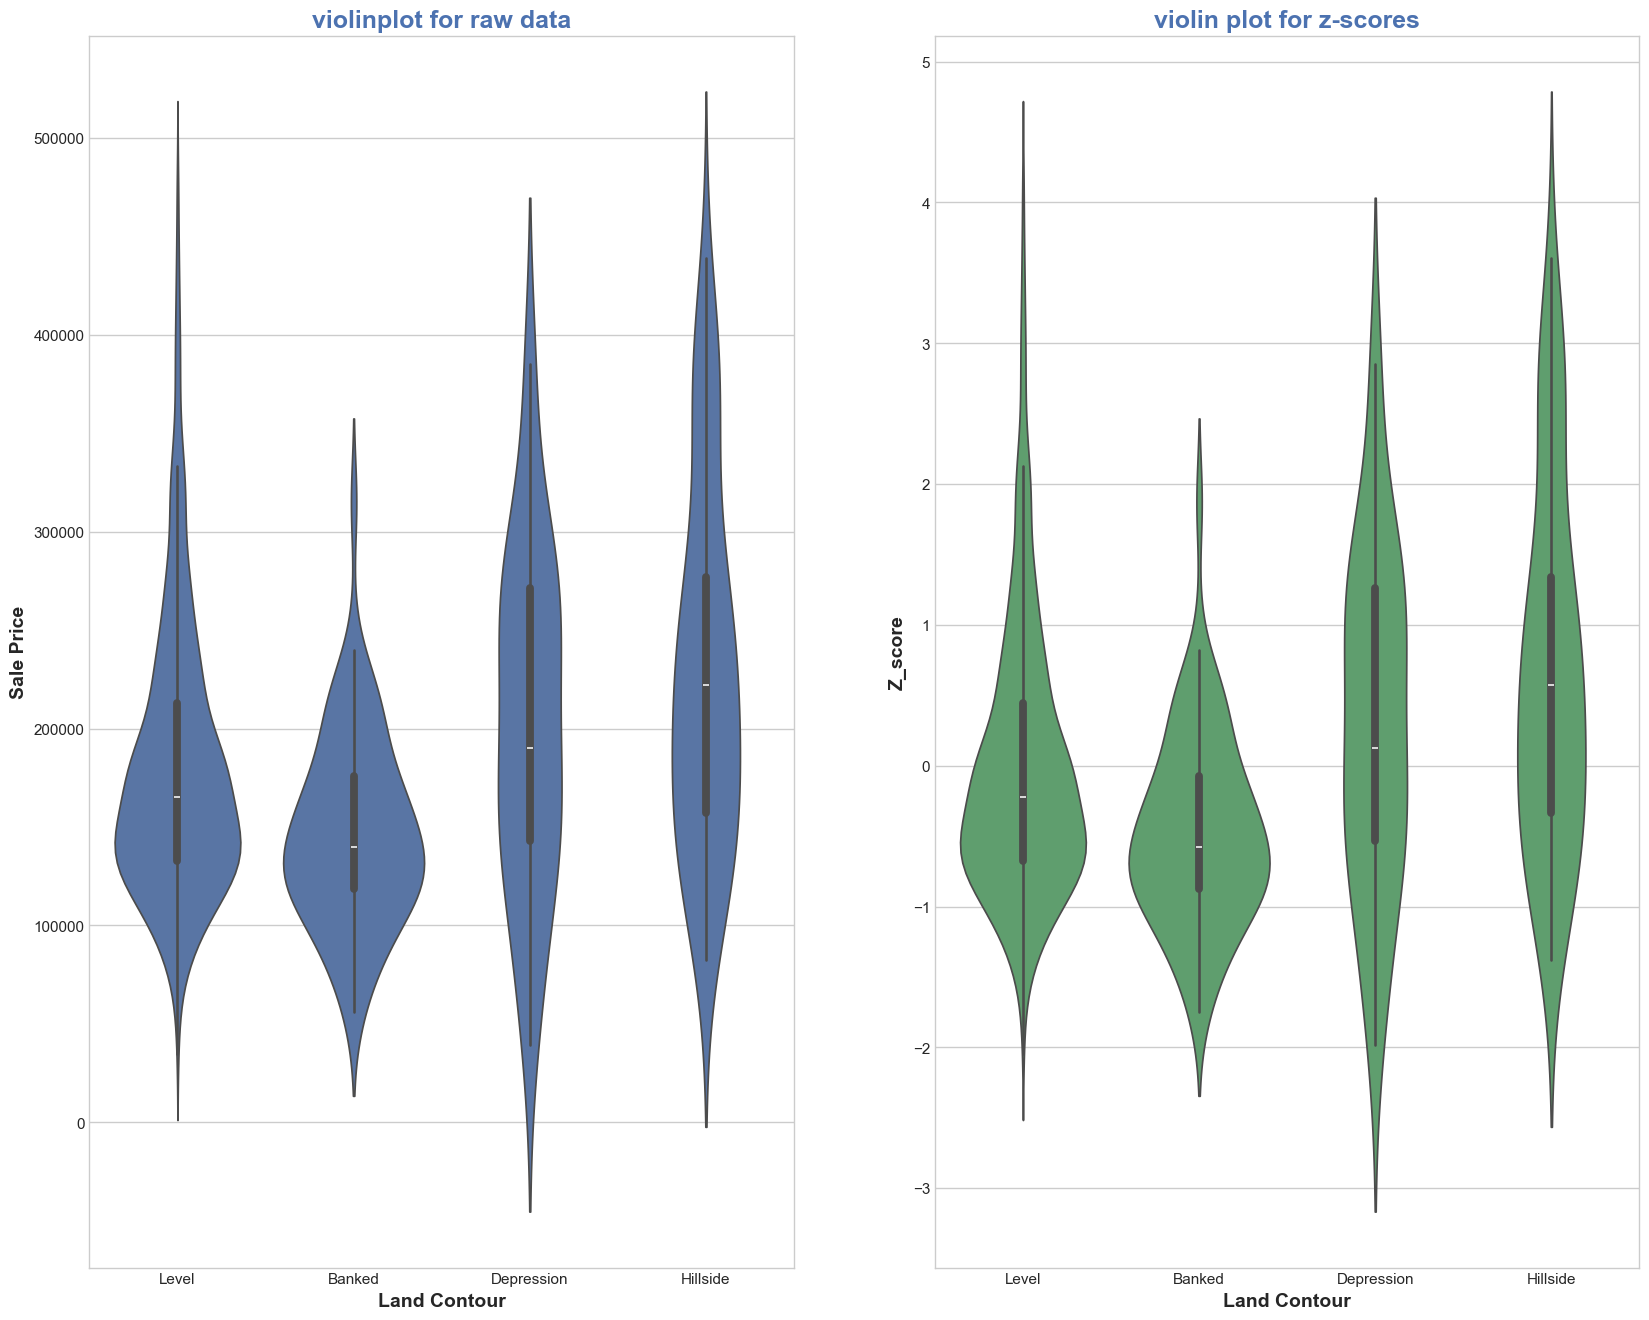

In [46]:
plt.figure(figsize=(20,16))
plt.subplot(121)
sns.violinplot(x='Land Contour', y='Sale Price', data=df_realestate,color="b")
plt.title('violinplot for raw data', fontweight='bold', color = 'b', fontsize='18', horizontalalignment='center')
plt.xlabel('Land Contour', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.ylabel('Sale Price', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.subplot(122)
sns.violinplot(x='Land Contour', y='z_score', data=df_realestate,color="g")
plt.title('violin plot for z-scores', fontweight='bold', color = 'b', fontsize='18', horizontalalignment='center')
plt.xlabel('Land Contour', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.ylabel('Z_score', fontweight='bold', fontsize='14', horizontalalignment='center')

A violen plot combines the concept of box plot and density plot. It shows summary statistics and density of each variables. Wider section suggest higher density, more data points, whereas narrower section suggest lower density fewer data point. It is in general symmetrical. As, we can see from the plot , for example, Depression has large sale price ranging from 0 to 400000 where most of the values from 150000 to 250000 range. Level has lower sale price, most of the value ranging from 100000 to 200000. 

<h4 style="color:black;"> Section 6d: Create Boxplot for Sale Price by Neighborhood</h4>

Text(0.5, 1.0, 'boxplot for Sale Price and Neighborhood')

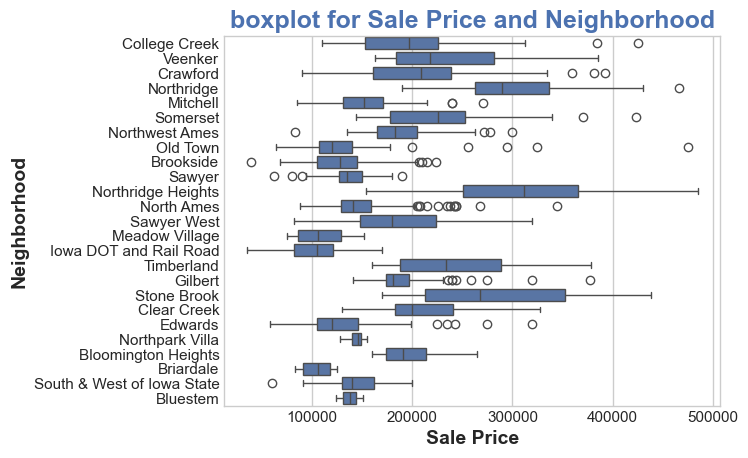

In [47]:
sns.boxplot(x='Sale Price', y='Neighborhood', data=df_realestate)
plt.xlabel('Sale Price', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.ylabel('Neighborhood', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.title('boxplot for Sale Price and Neighborhood', fontweight='bold', color = 'b', fontsize='18', horizontalalignment='center')

Box plot is the graphical representation of particulat set of sttaistics called the five number summary (First number-minimum, first quartile 25%, median, third qurtile 75%). They are often used to detect the outlier of the dataset. As we can see from the plot, North Ames has many outliers or extreem values. These ertreme values are close to each other. On the contrary, Bluestem has almost no outliers. 

<h3 style="color:black;"> 7. Comparing Features to Visualize a Relationship</h3>

<h4 style="color:black;"> Section 7a: Scatterplot for 1st and 2nd floor</h4>

Text(0.5, 1.0, 'Scatterplot for 1st and 2nd floor')

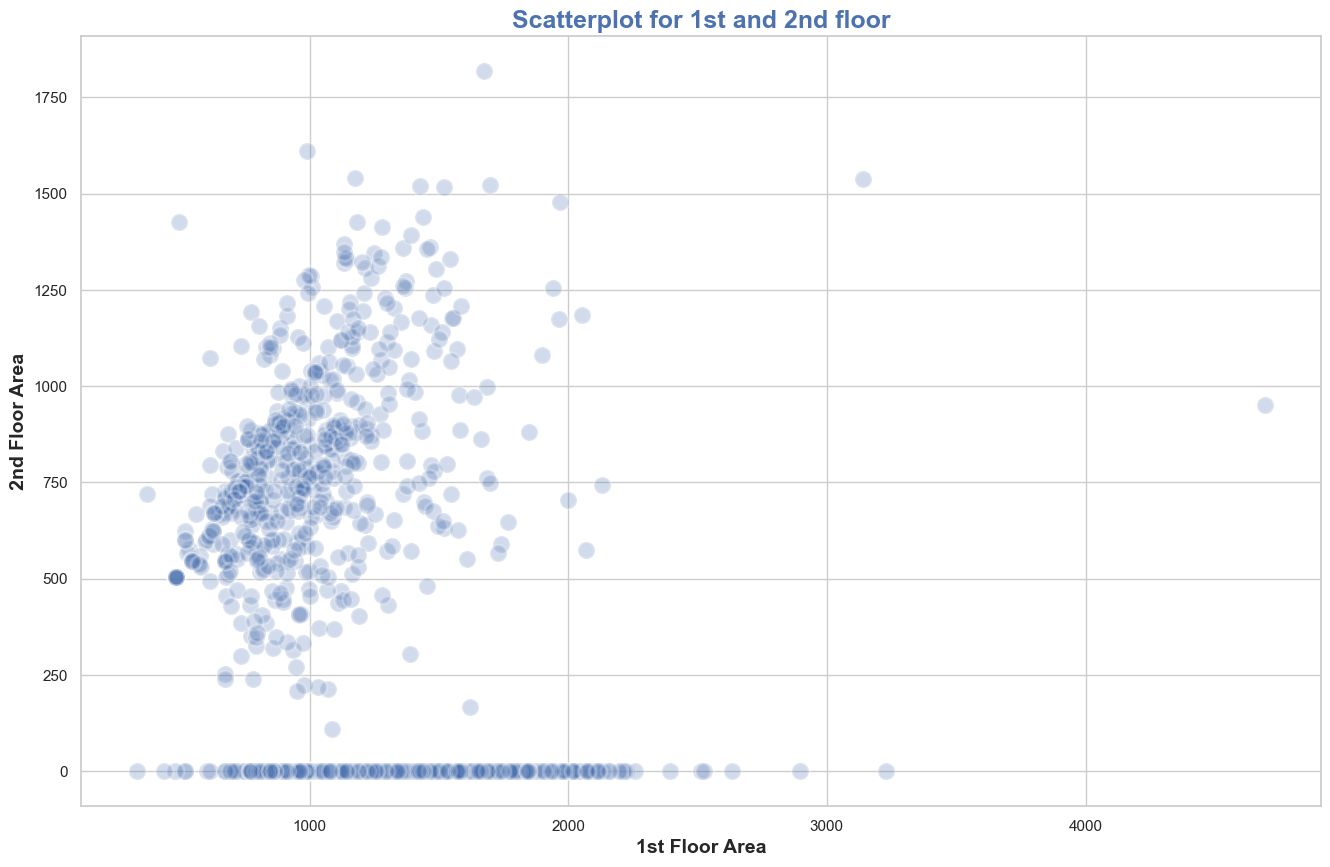

In [48]:
plt.figure(figsize=(16,10))
sns.set(style='whitegrid')
sns.scatterplot(data=df_realestate, x='1st Floor Area', y='2nd Floor Area', s=150, alpha=0.25, color = 'b',edgecolor='white', linewidth=2)
plt.xlabel('1st Floor Area', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.ylabel('2nd Floor Area', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.title('Scatterplot for 1st and 2nd floor', fontweight='bold', color = 'b', fontsize='18', horizontalalignment='center')

A scatterplot simply plots the two values of an observation as a coordinate pair. Around 500 to 1000, first floor area and second floor area are closely related with each other. Thus, this scatter plot describes the relationship between 1st Floor Area and 2nd Floor Area. Overall, 1st Floor Area and 2nd Floor area is not strongly related with each other and I expect r value for the plot will be less. Atleast, they do not have strong linear relationship. 

<h4 style="color:black;"> Section 7b: Scatterplot for ‘Living Area Above Grade’ and ‘Sale Price’ and ‘Kitchen Quality’.</h4>

Text(0.5, 1.0, 'Scatterplot for Living Area Above Grade and Sale Price')

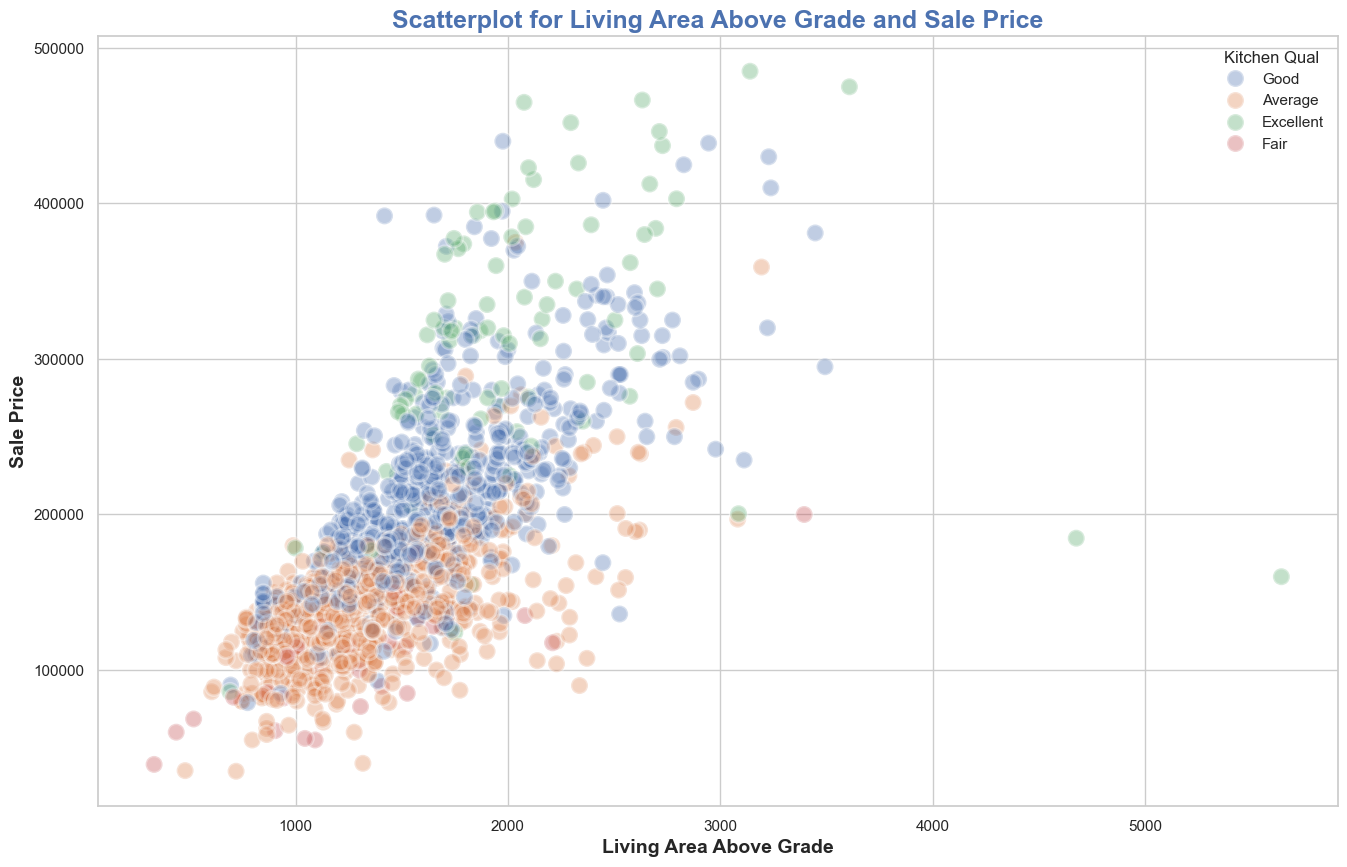

In [49]:
plt.figure(figsize=(16,10))
sns.set(style='whitegrid')
sns.scatterplot(data=df_realestate, x='Living Area Above Grade', y='Sale Price', s=150, alpha=0.35, color = 'b',hue=df_realestate['Kitchen Qual'],edgecolor='white', linewidth=2)
plt.xlabel('Living Area Above Grade', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.ylabel('Sale Price', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.title('Scatterplot for Living Area Above Grade and Sale Price', fontweight='bold', color = 'b', fontsize='18', horizontalalignment='center')

Around 1000, Living Area Above Grade is stronlgy correlated with Sale price considering Kitchen Qual is Average. Around 1000-2000 of Living Area Above Grade is stronly correlated with Sale price values around 150000-250000 when Kitchen Qual is Good. Thus, this scatter plot describes the relationship between Living Area Above Grade and Sale Price depending on the Kitchen Qual nature. Again, overall, Living Area Above Grade is not strongly related with Sale Price and I expect r value for the plot will be less. Atleast, they do not have strong linear relationship. 

<h4 style="color:black;"> Section 7c: Create a Pairplot</h4>

In [50]:
df_pairplot = pd.DataFrame()
df_pairplot['Basement Finished Area'] = df_realestate['Basement Finished Area']
df_pairplot['1st Floor Area'] = df_realestate['1st Floor Area']
df_pairplot['2nd Floor Area'] = df_realestate['2nd Floor Area']
df_pairplot['Total Rooms Above Grade'] = df_realestate['Total Rooms Above Grade']
df_pairplot['Sale Price'] = df_realestate['Sale Price']
df_pairplot

,Basement Finished Area,1st Floor Area,2nd Floor Area,Total Rooms Above Grade,Sale Price
0,706,856,854,8,208500
1,978,1262,0,6,181500
2,486,920,866,6,223500
3,216,961,756,7,140000
4,655,1145,1053,9,250000
...,...,...,...,...,...
1385,0,953,694,7,175000
1386,790,2073,0,7,210000
1387,275,1188,1152,9,266500
1388,49,1078,0,5,142125


<Figure size 1600x1000 with 0 Axes>

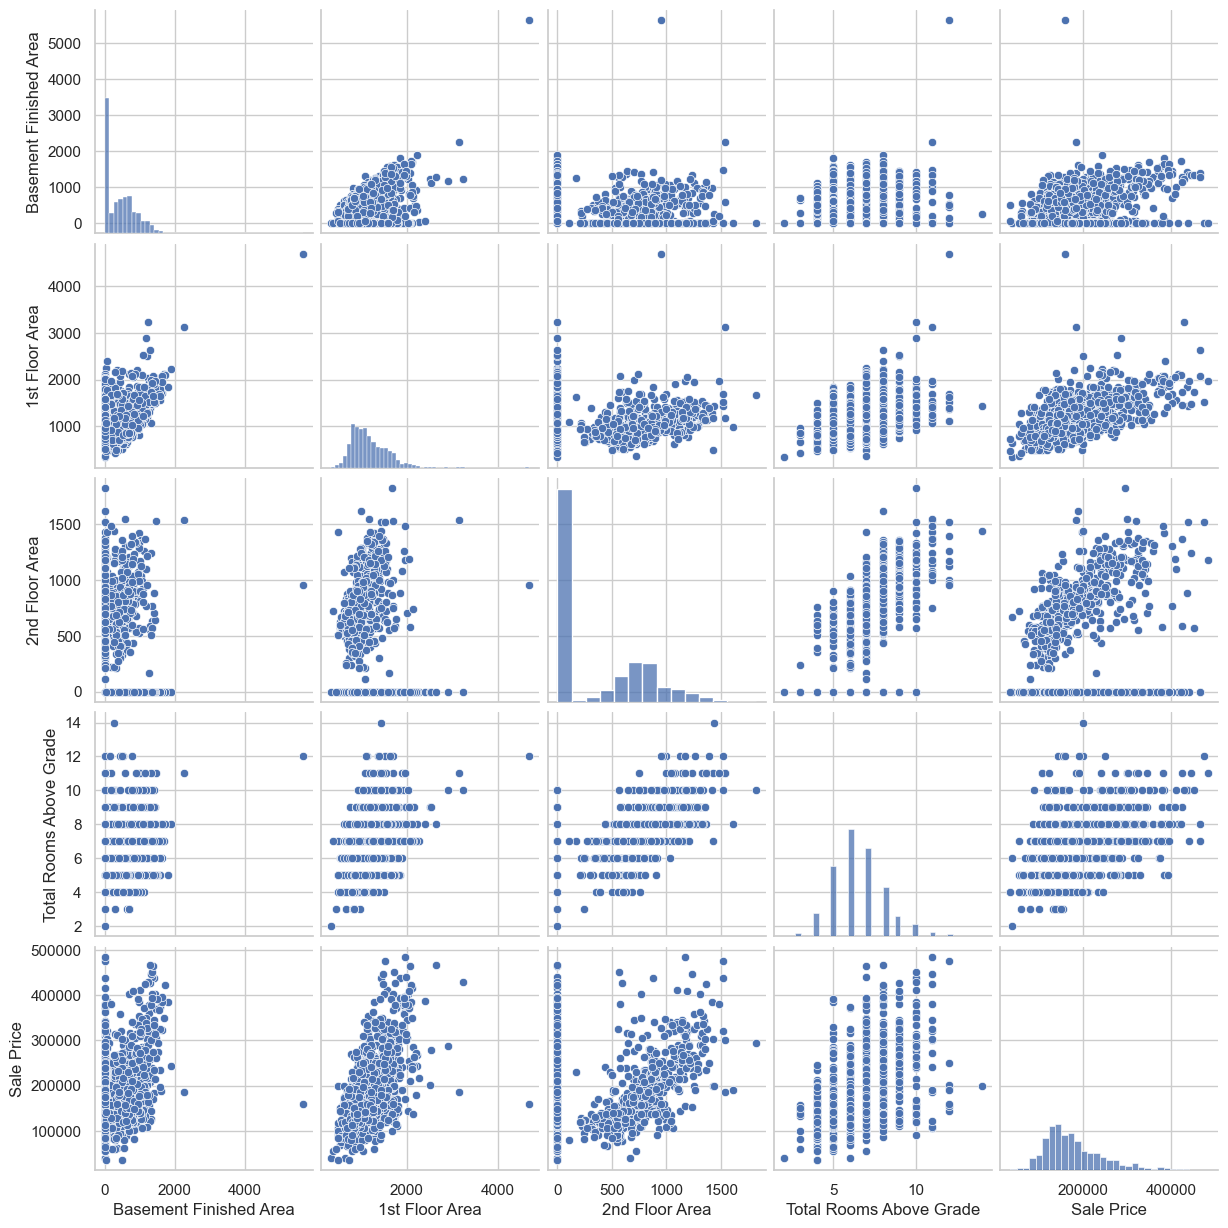

In [51]:
plt.figure(figsize=(16,10))
sns.set(style='whitegrid')
sns.pairplot(df_pairplot)

Pair plot allows us to create scatter plot among all the column or features of our dataset and put it in one big diagram. As we can see from the above diagram, pairplot gives visulatization of relationship of all data featuers in one single plot. From the first glace, this plot gives us a idea which two features having relationship among them and which do not. For example, Basement Finished Area and 1st Floor Area both having strong relationshsip with Sale Price. In otherwords, Sale Price depends on the Basement Finished Area and 1st Floor Area. On the contrary, Basement Finished Area is not affecting much on Total Rooms Above Grade because the scatter plot between sale price and total room above grade is very scatter. This is also reflected in the below correlation matrix. The correlation matrix between Basement Finished Area and Sale Price is 0.345 and with 1st Floor area is 0.422 which is moderate correlation where as the correlation value between Basement Finished Area and Total Rooms Above Grade is 0.000857 (practically 0) which is very small.

In [52]:
corr_matrix=df_pairplot.corr()
corr_matrix

,Basement Finished Area,1st Floor Area,2nd Floor Area,Total Rooms Above Grade,Sale Price
Basement Finished Area,1.000000,0.422603,-0.172249,0.000857,0.344894
1st Floor Area,0.422603,1.000000,-0.255632,0.375815,0.580592
2nd Floor Area,-0.172249,-0.255632,1.000000,0.609766,0.280963
Total Rooms Above Grade,0.000857,0.375815,0.609766,1.000000,0.502978
Sale Price,0.344894,0.580592,0.280963,0.502978,1.000000


<Axes: >

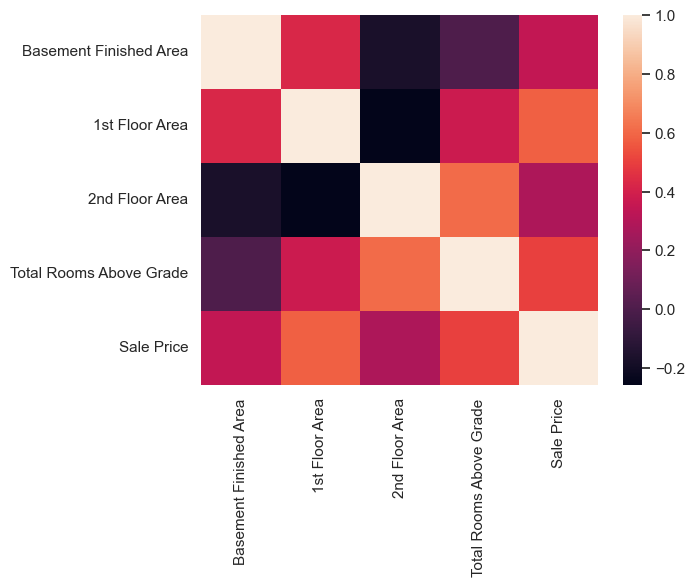

In [53]:
sns.heatmap(corr_matrix)